# 1. aligned to human genome

### Terminal Command

$ bowtie2 -p 8 --very-fast --no-unal -x /data/references/hg19/hg19 -1 /data/Lab6_data/mixed_reads1.fastq -2 /data/Lab6_data/mixed_reads2.fastq -S output.sam --un-conc unaligned.fastq


Output：

1285441 reads; of these:
  1285441 (100.00%) were paired; of these:
    1285105 (99.97%) aligned concordantly 0 times
    114 (0.01%) aligned concordantly exactly 1 time
    222 (0.02%) aligned concordantly >1 times
    ----
    1285105 pairs aligned concordantly 0 times; of these:
      227762 (17.72%) aligned discordantly 1 time
    ----
    1057343 pairs aligned 0 times concordantly or discordantly; of these:
      2114686 mates make up the pairs; of these:
        2062758 (97.54%) aligned 0 times
        15162 (0.72%) aligned exactly 1 time
        36766 (1.74%) aligned >1 times
19.76% overall alignment rate

# Q&A

1. What will you use for the database?
   
   the database will be the human genome database which is stored in /data/reference/hg19/hg19 


2. What will you use for the input reads?

   the input reads will be the reads files stored in /data/Lab6_data
   
   Because we will align pair end reads, so we should use both of the reads file.
   

3. If you use the -un unaligned.fastq option, what will unaligned.fastq contain?

    Actually, I used -un-conc unaligned.fastq option. I think there will be the paired-end reads that fail to align concordantly. Particularly, the unligned reads from mixed_reads1 will go to unaligned.1.fastq. And the unaligned read from mixed_reads2 will go to unaligned.2.fastq.
    ## The unaligned.fastq file will still contain the sequence from human genome. That is because the pairs aligned discordantly and mates aligned singly went to the unaligned.fastq file as well.
    The detailed description of this parameter from bowtie2 manual is here:
    
    Write paired-end reads that fail to align concordantly to file(s) at <path>. These reads correspond to the SAM records with the FLAGS 0x4 bit set and either the 0x40 or 0x80 bit set (depending on whether it’s mate #1 or #2). .1 and .2 strings are added to the filename to distinguish which file contains mate #1 and mate #2. If a percent symbol, %, is used in <path>, the percent symbol is replaced with 1 or 2 to make the per-mate filenames. Otherwise, .1 or .2 are added before the final dot in <path> to make the per-mate filenames. Reads written in this way will appear exactly as they did in the input files, without any modification (same sequence, same name, same quality string, same quality encoding). Reads will not necessarily appear in the same order as they did in the inputs.
    


4. What percentage of your sequencing library came from contaminating human DNA?

    There are 19.76% of my sequencing library coming from contaminating human DNA.



# 2. filtered reads aligned to bacterium genome

## Use --very-fast

$ bowtie2 -p 8 --very-fast --no-unal -x /data/references/shewanella_oneidensis_mr-1/shewanella_oneidensis_mr-1 -1 ./unaligned.1.fastq -2 ./unaligned.2.fastq -S output_SO.sam --un-conc unaligned_SO.fastq

1285105 reads; of these:
  1285105 (100.00%) were paired; of these:
    1049640 (81.68%) aligned concordantly 0 times
    220987 (17.20%) aligned concordantly exactly 1 time
    14478 (1.13%) aligned concordantly >1 times
    ----
    1049640 pairs aligned concordantly 0 times; of these:
      288853 (27.52%) aligned discordantly 1 time
    ----
    760787 pairs aligned 0 times concordantly or discordantly; of these:
      1521574 mates make up the pairs; of these:
        1245335 (81.85%) aligned 0 times
        221076 (14.53%) aligned exactly 1 time
        55163 (3.63%) aligned >1 times
51.55% overall alignment rate


## Use --very-sensitive

### Terminal command
### Output

$ bowtie2 -p 8 --very-sensitive --no-unal -x /data/references/shewanella_oneidensis_mr-1/shewanella_oneidensis_mr-1 -1 ./unaligned.1.fastq -2 ./unaligned.2.fastq -S output_SO_sensitive.sam --un-conc unaligned_SO_sensitive.fastq


Output：
1285105 reads; of these:
  1285105 (100.00%) were paired; of these:
    1048972 (81.63%) aligned concordantly 0 times
    221437 (17.23%) aligned concordantly exactly 1 time
    14696 (1.14%) aligned concordantly >1 times
    ----
    1048972 pairs aligned concordantly 0 times; of these:
      291246 (27.76%) aligned discordantly 1 time
    ----
    757726 pairs aligned 0 times concordantly or discordantly; of these:
      1515452 mates make up the pairs; of these:
        1238527 (81.73%) aligned 0 times
        220113 (14.52%) aligned exactly 1 time
        56812 (3.75%) aligned >1 times
51.81% overall alignment rate

# Q&A

1. If you use the --un unaligned.fastq option, what will unaligned.fastq contain?

    1049640 pairs of reads that are aligned concordantly 0 times.
    
    
2. What percentage of your filtered library didn't align to the reference genome?

    48.45% (1 - 51.55%) of the filtered library didn't align to the reference genome.
    
    
3. If use --very-sensitive instead of --very-fast, does this percentage increase or decrease?
    
    48.19%
    
    so the percentage decreases.

### read the .tab file with pandas package

In [1]:
import pandas

whole_table = pandas.read_table("pileup_SO.tab", names = ['chrom', 'position', 'depth'])


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  This is separate from the ipykernel package so we can avoid doing imports until


### extract depth and position from .tab file and make them become list

In [2]:
dep = whole_table['depth']
position = whole_table['position']

In [3]:
dep = list(dep)
#print(dep)

position = list(position)

### Print the max, min and average depth

In [13]:
import statistics as sta
max_coverage = max(dep)

min_coverage = min(dep)

average_coverage = sta.mean(dep)
#print(type(average_coverage))
print("Max depth is %d\nMin depth is %d\nAverage depth is %f" %(max_coverage, min_coverage, average_coverage))

Max depth is 472
Min depth is 1
Average depth is 70.010275


# Q&A

1. What is the min, max, and mean coverage across all positions?

The max coverage is 472,
the min coverage is 1,
the average coverage is 70.010275



# Plot the depth of coverage in every position

<function matplotlib.pyplot.show(*args, **kw)>

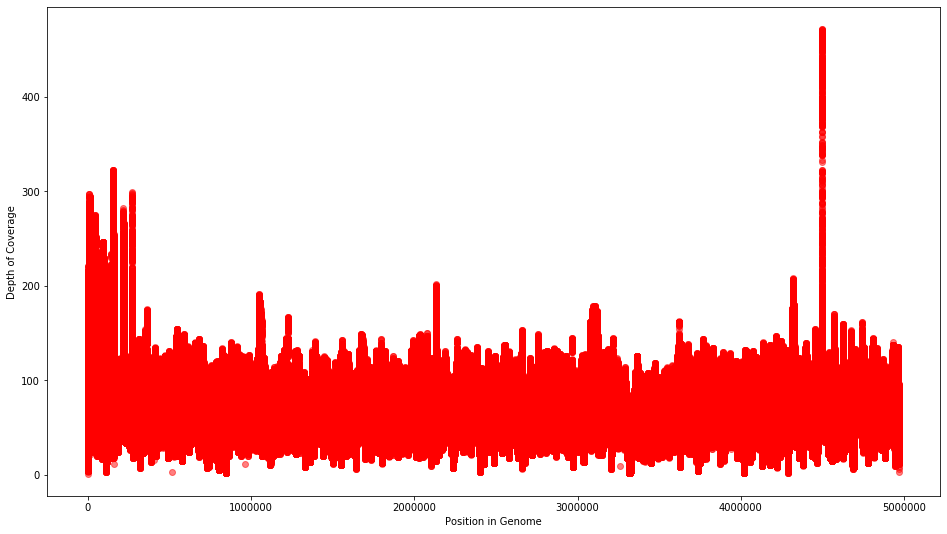

In [26]:
from matplotlib import pyplot as plt

#list_po = range(0, average_len)
plt.figure(figsize= [16,9])
plt.scatter(position, dep , color = 'red', alpha = 0.5)
plt.xlabel("Position in Genome")
plt.ylabel("Depth of Coverage")
plt.show


# Plot the histogram which shows the coverage depth distrbution.

<function matplotlib.pyplot.show(*args, **kw)>

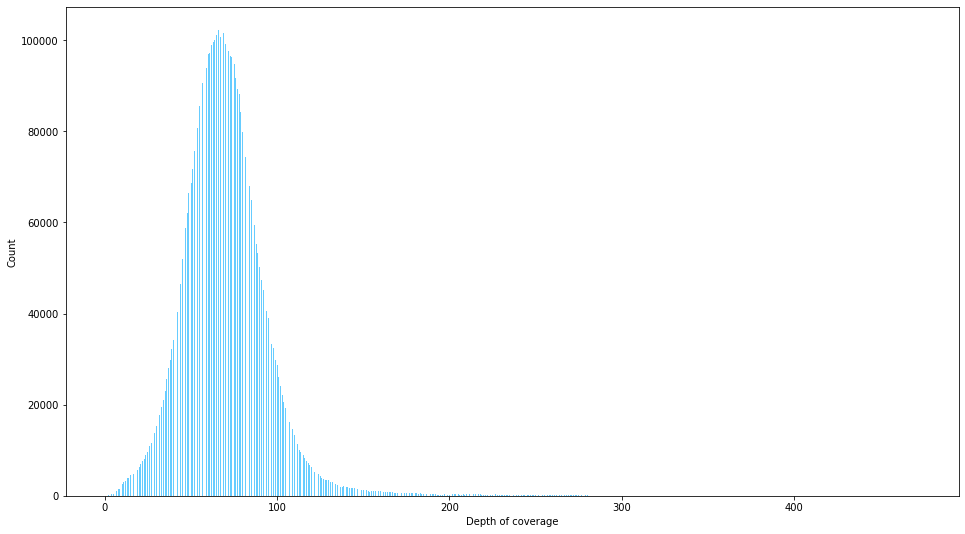

In [24]:
from matplotlib import pyplot as plt
plt.figure(figsize = [16,9])
plt.hist(dep, bins = 1000, facecolor = "#66CCFF")
plt.xlabel("Depth of coverage")
plt.ylabel("Count")
plt.show

# Extra Credict 1: 

## 1. def a function which can calculate the average depth for every 100 basepairs.

In [4]:
def ave_depth(dep):
    
    average_len = int(len(dep)/100) + 1
    begin = 0
    end = 99
    average_depthes = []
    for i in range(0, average_len):
        Po = dep[begin:end]
        average_depth = sum(Po)/100
        average_depthes.append(average_depth)
        begin += 100
        if i == average_len - 1:
            end = len(dep)-1
        else:
            end += 100
            
    return average_depthes


## 2. def a function to deal with .tab file


In [3]:
def get_depth(filename):
    import pandas
    table = pandas.read_table(filename, names = ["Position", "Depth"], index_col = 0)
    position = list(table["Position"])
    dep = list(table["Depth"])
    return dep

    

## 3. def a function to plot average depth

In [2]:
def plot_dep(ave_dep):
    from matplotlib import pyplot as plt

    list_po = range(0, len(ave_dep))
    plt.figure(figsize= [16,9])
    plt.scatter(list_po, ave_dep , color = 'orange', alpha = 0.5)
    plt.xlabel("Position in Genome")
    plt.ylabel("Depth of Coverage")
    plt.show


## 4. Start to plot chromosome average depth

Because the whole depth table of human genome is too huge to store in the server. So I generate the depth table for 1 chromosome each time.

#### Terminal Command

$ samtools depth -r chr1 hg_s.bam > chr1.tab

### Chr1

In [5]:
dep = get_depth("chr1.tab")

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  This is separate from the ipykernel package so we can avoid doing imports until


#### Plot the average depth (per 100 bps)

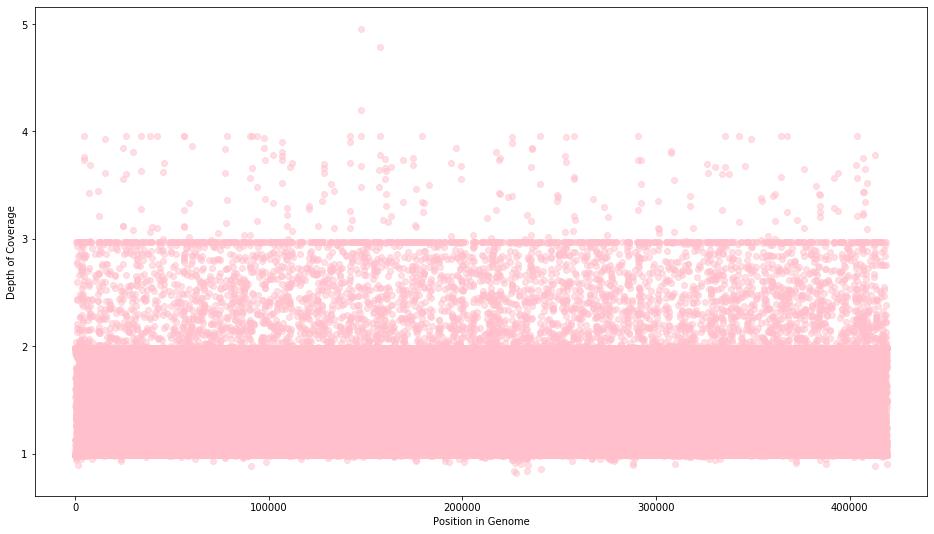

In [12]:
ave_dep = ave_depth(dep)
plot_dep(ave_dep)

## Chr2

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  This is separate from the ipykernel package so we can avoid doing imports until


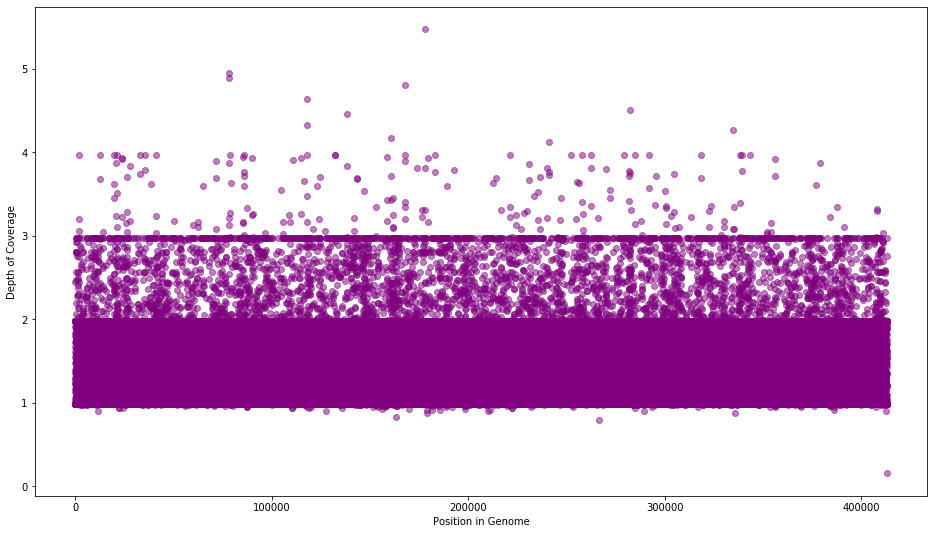

In [15]:
dep = get_depth("chr2.tab")
ave_dep = ave_depth(dep)
plot_dep(ave_dep)

## Chr3

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  This is separate from the ipykernel package so we can avoid doing imports until


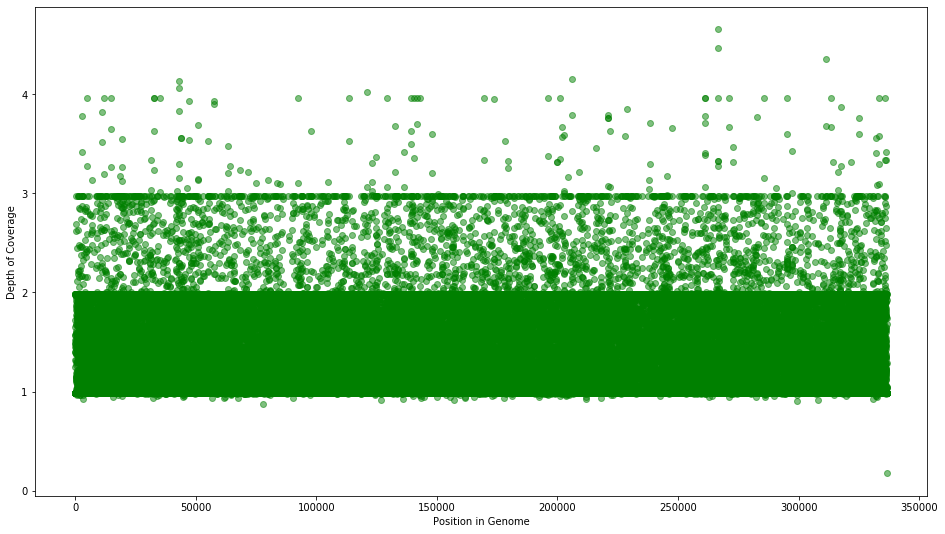

In [17]:
dep = get_depth("chr3.tab")
ave_dep = ave_depth(dep)
plot_dep(ave_dep)

## Chr4

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  This is separate from the ipykernel package so we can avoid doing imports until


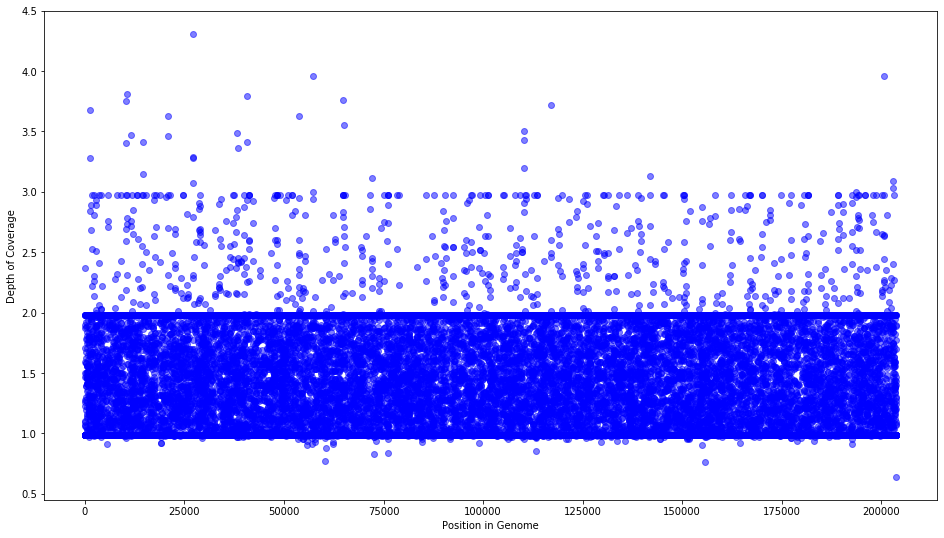

In [20]:
dep = get_depth("chr4.tab")
ave_dep = ave_depth(dep)
plot_dep(ave_dep)

## Chr5

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  This is separate from the ipykernel package so we can avoid doing imports until


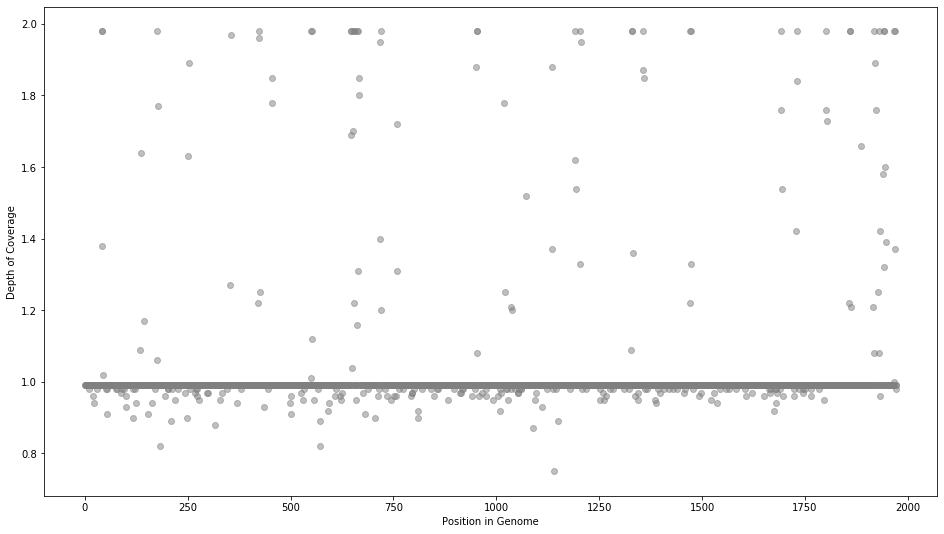

In [27]:
dep = get_depth("chr5.tab")
ave_dep = ave_depth(dep)
plot_dep(ave_dep)

## Chr6

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  This is separate from the ipykernel package so we can avoid doing imports until


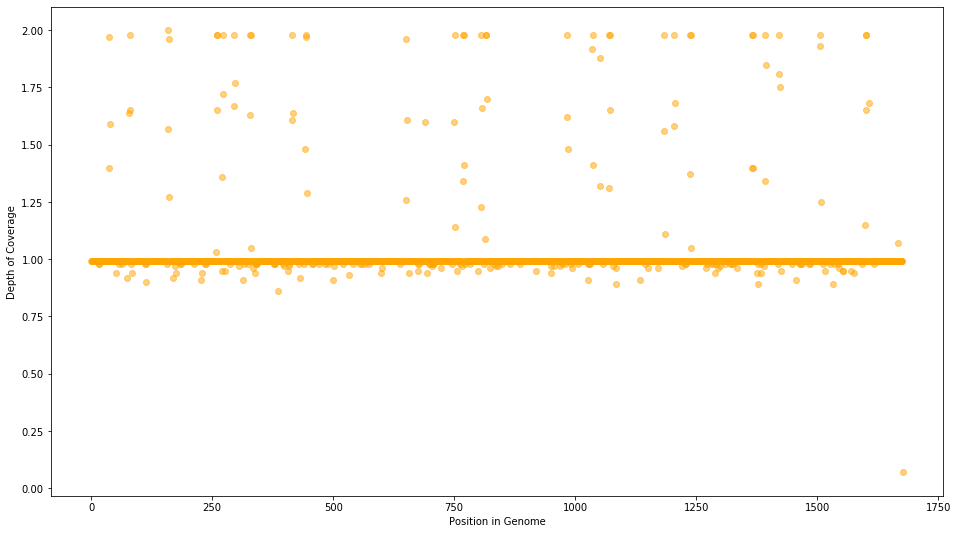

In [7]:
dep = get_depth("chr6.tab")
ave_dep = ave_depth(dep)
plot_dep(ave_dep)

## Chr7

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  This is separate from the ipykernel package so we can avoid doing imports until


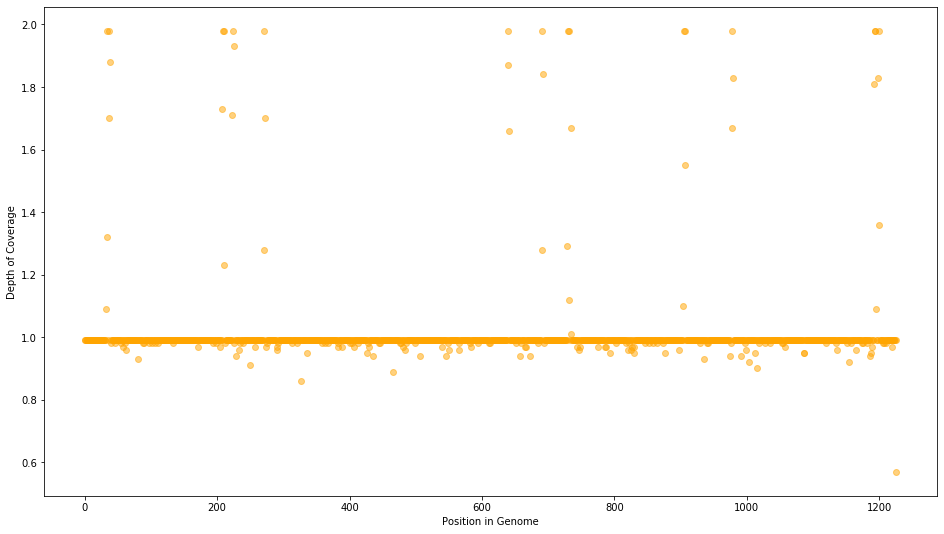

In [8]:
dep = get_depth("chr7.tab")
ave_dep = ave_depth(dep)
plot_dep(ave_dep)

## Chr8

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  This is separate from the ipykernel package so we can avoid doing imports until


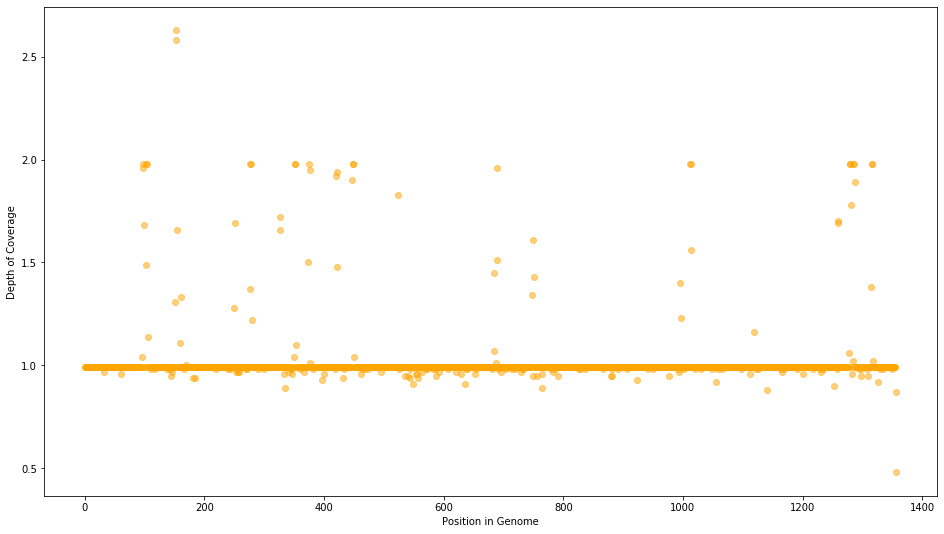

In [6]:
dep = get_depth("chr8.tab")
ave_dep = ave_depth(dep)
plot_dep(ave_dep)

## Chr9

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  This is separate from the ipykernel package so we can avoid doing imports until


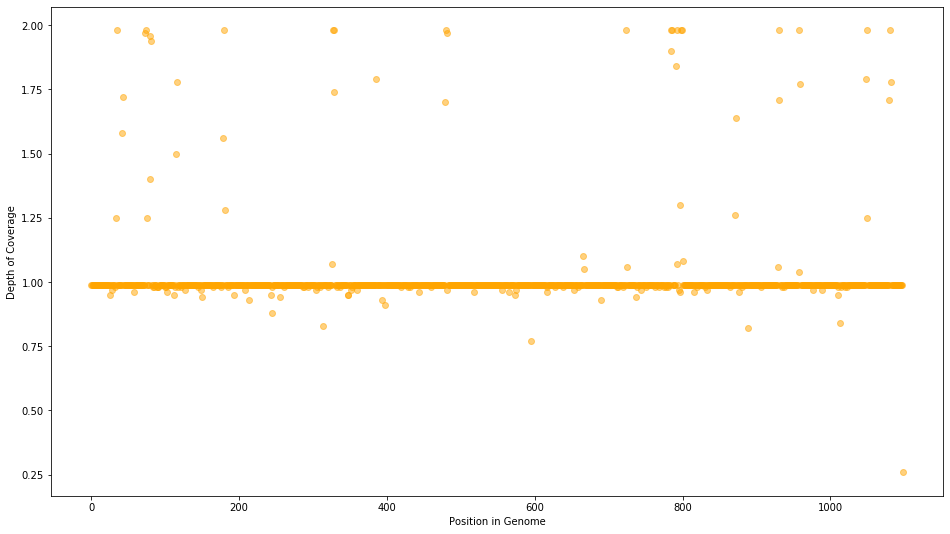

In [7]:
dep = get_depth("chr9.tab")
ave_dep = ave_depth(dep)
plot_dep(ave_dep)

## Chr10

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  This is separate from the ipykernel package so we can avoid doing imports until


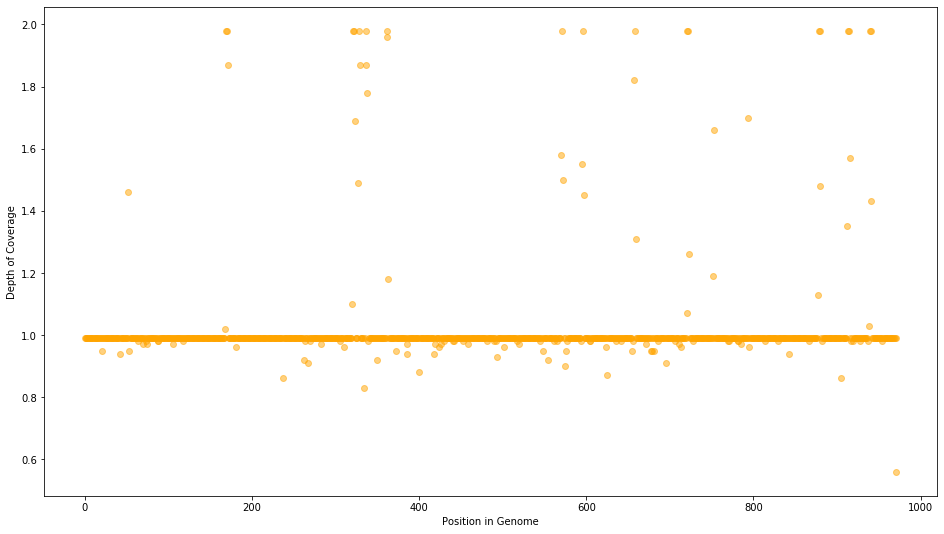

In [8]:
dep = get_depth("chr10.tab")
ave_dep = ave_depth(dep)
plot_dep(ave_dep)

## Chr11

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  This is separate from the ipykernel package so we can avoid doing imports until


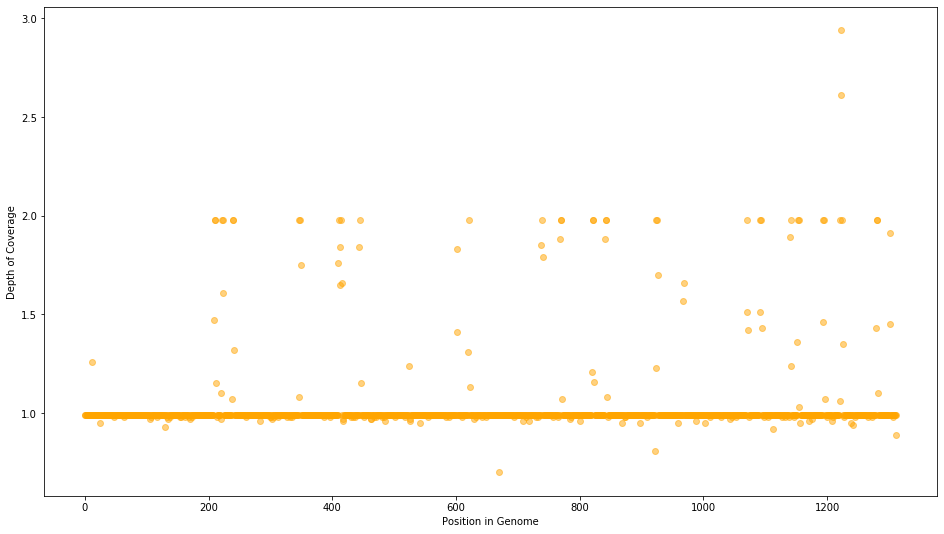

In [9]:
dep = get_depth("chr11.tab")
ave_dep = ave_depth(dep)
plot_dep(ave_dep)

## Chr12

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  This is separate from the ipykernel package so we can avoid doing imports until


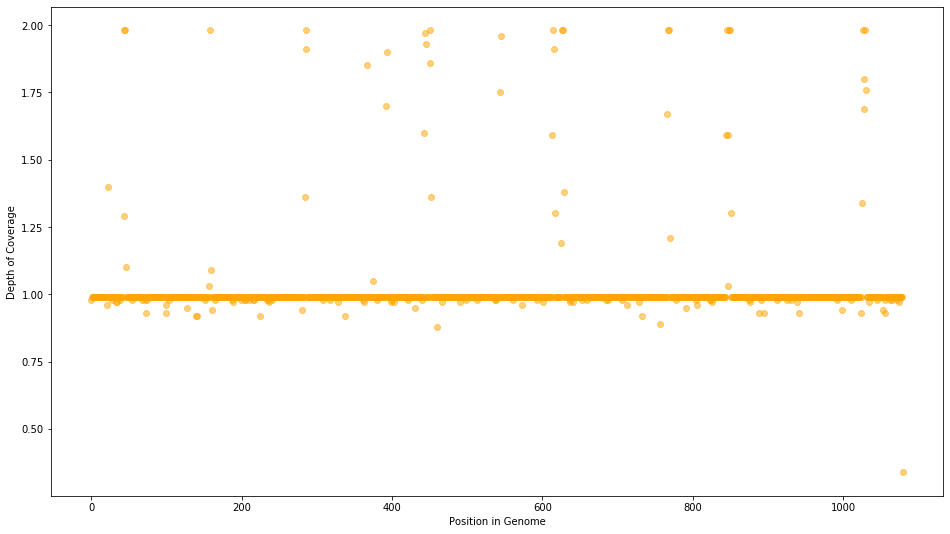

In [10]:
dep = get_depth("chr12.tab")
ave_dep = ave_depth(dep)
plot_dep(ave_dep)

## Chr13

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  This is separate from the ipykernel package so we can avoid doing imports until


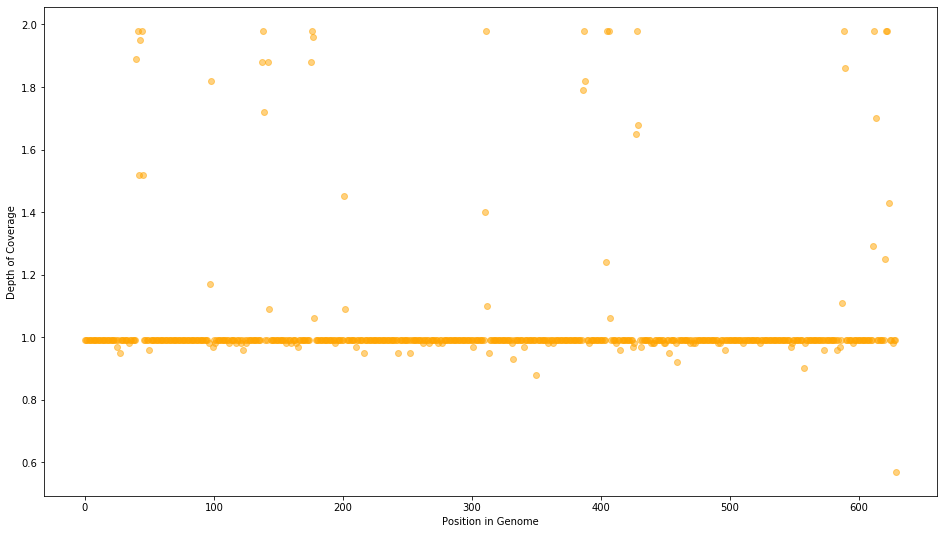

In [11]:
dep = get_depth("chr13.tab")
ave_dep = ave_depth(dep)
plot_dep(ave_dep)

## Chr14


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  This is separate from the ipykernel package so we can avoid doing imports until


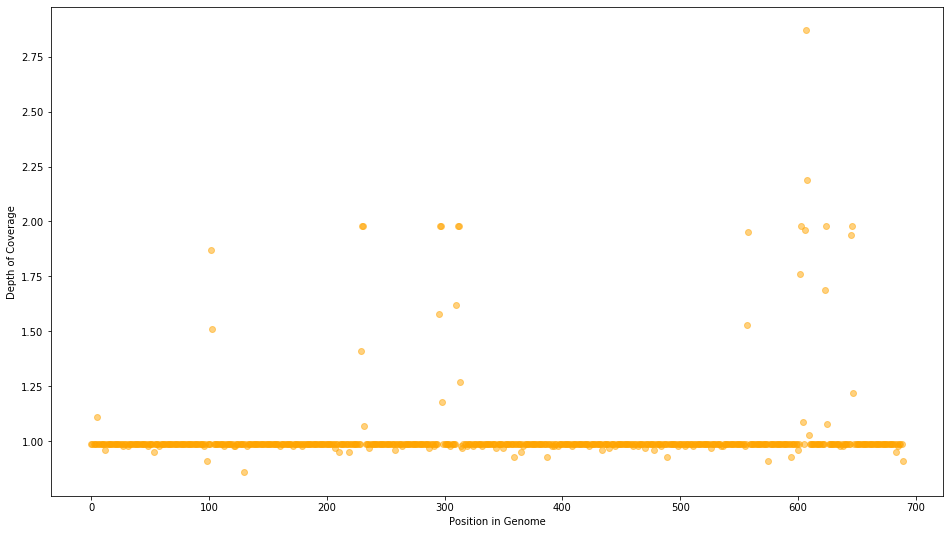

In [13]:
dep = get_depth("chr14.tab")
ave_dep = ave_depth(dep)
plot_dep(ave_dep)

## Chr15

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  This is separate from the ipykernel package so we can avoid doing imports until


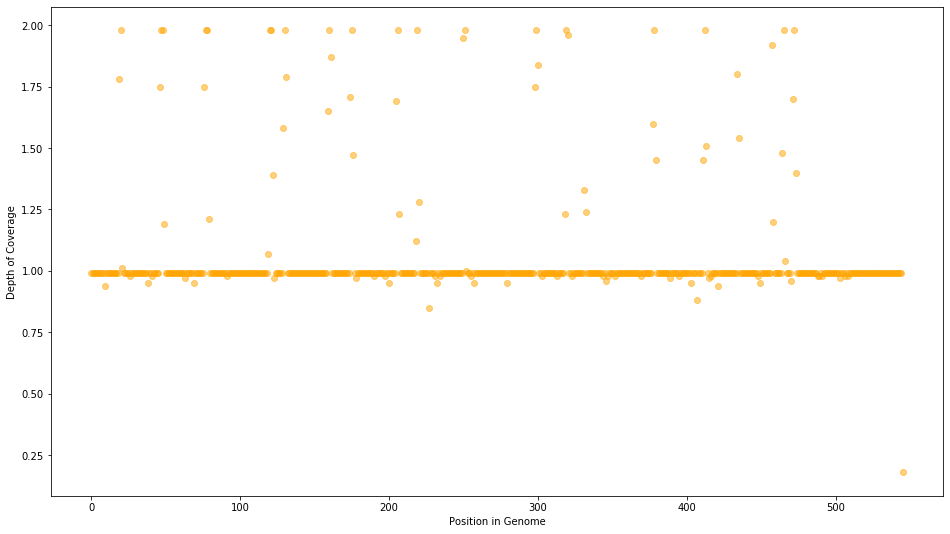

In [15]:
dep = get_depth("chr15.tab")
ave_dep = ave_depth(dep)
plot_dep(ave_dep)

## Chr16

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  This is separate from the ipykernel package so we can avoid doing imports until


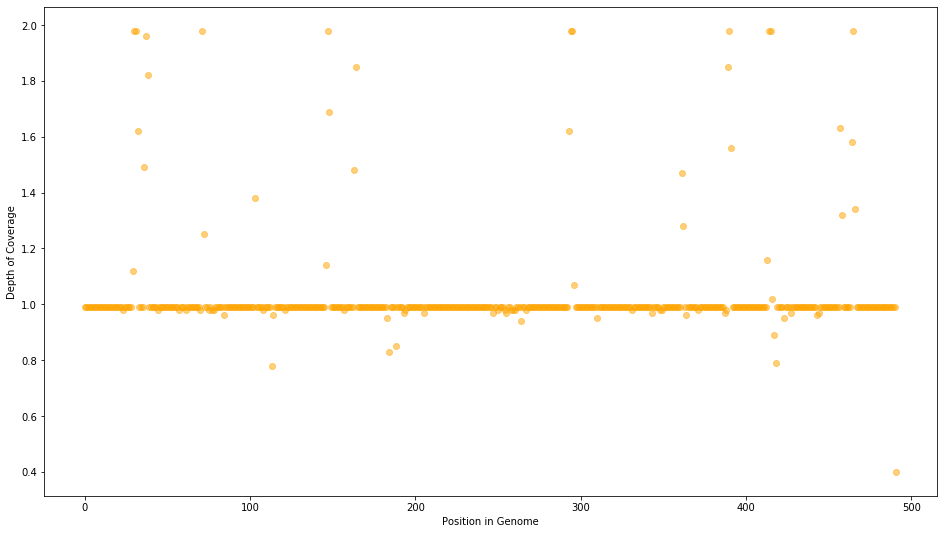

In [16]:
dep = get_depth("chr16.tab")
ave_dep = ave_depth(dep)
plot_dep(ave_dep)

## chr17

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  This is separate from the ipykernel package so we can avoid doing imports until


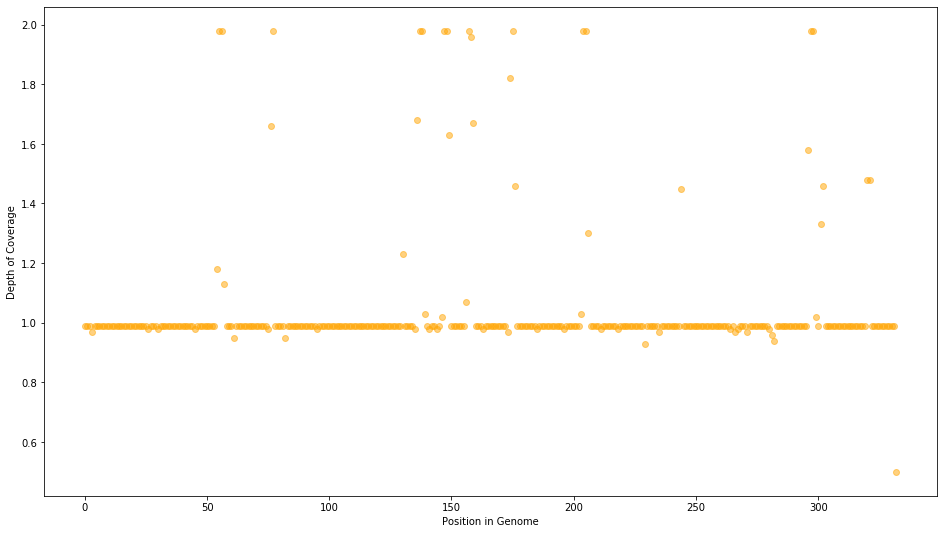

In [17]:
dep = get_depth("chr17.tab")
ave_dep = ave_depth(dep)
plot_dep(ave_dep)

## Chr18

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  This is separate from the ipykernel package so we can avoid doing imports until


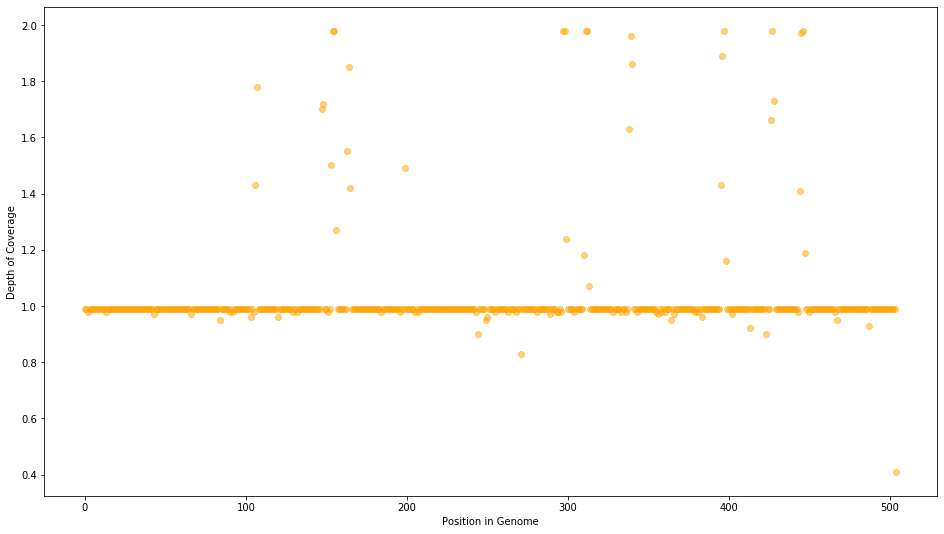

In [18]:
dep = get_depth("chr18.tab")
ave_dep = ave_depth(dep)
plot_dep(ave_dep)

## Chr19

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  This is separate from the ipykernel package so we can avoid doing imports until


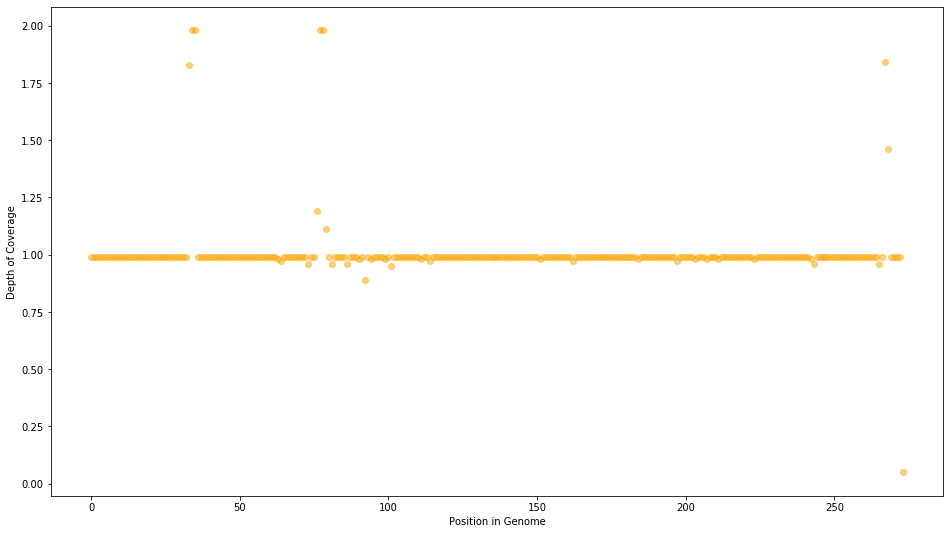

In [19]:
dep = get_depth("chr19.tab")
ave_dep = ave_depth(dep)
plot_dep(ave_dep)

## Chr 20

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  This is separate from the ipykernel package so we can avoid doing imports until


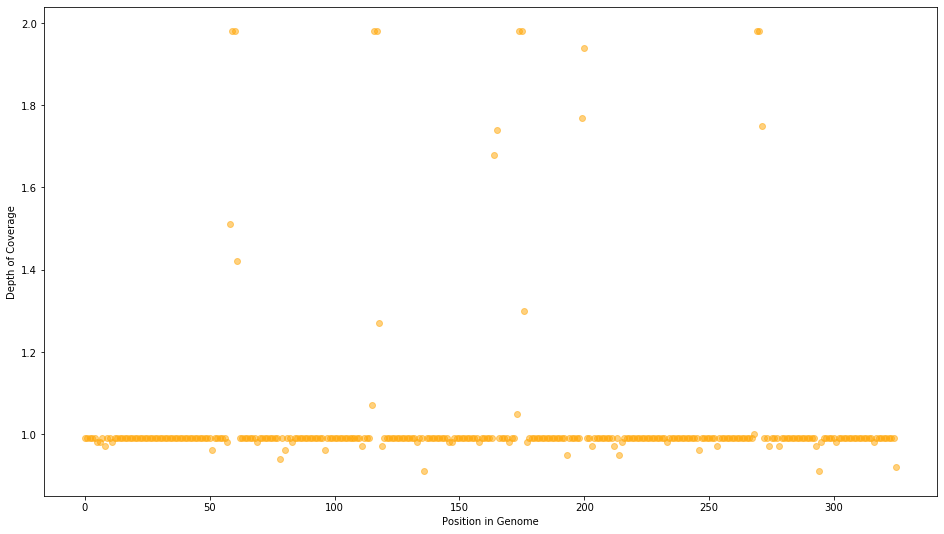

In [20]:
dep = get_depth("chr20.tab")
ave_dep = ave_depth(dep)
plot_dep(ave_dep)

## Chr21

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  This is separate from the ipykernel package so we can avoid doing imports until


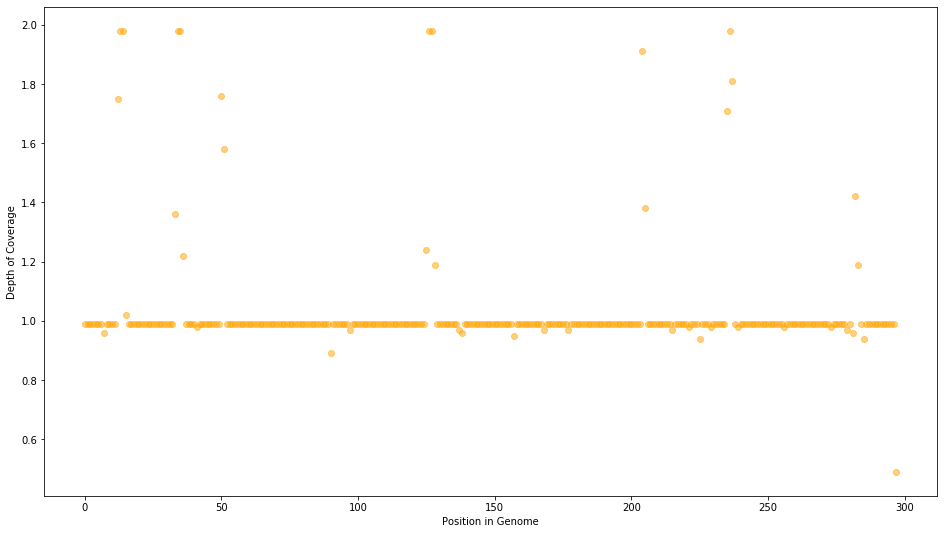

In [22]:
dep = get_depth("chr21.tab")
ave_dep = ave_depth(dep)
plot_dep(ave_dep)

## Chr22

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  This is separate from the ipykernel package so we can avoid doing imports until


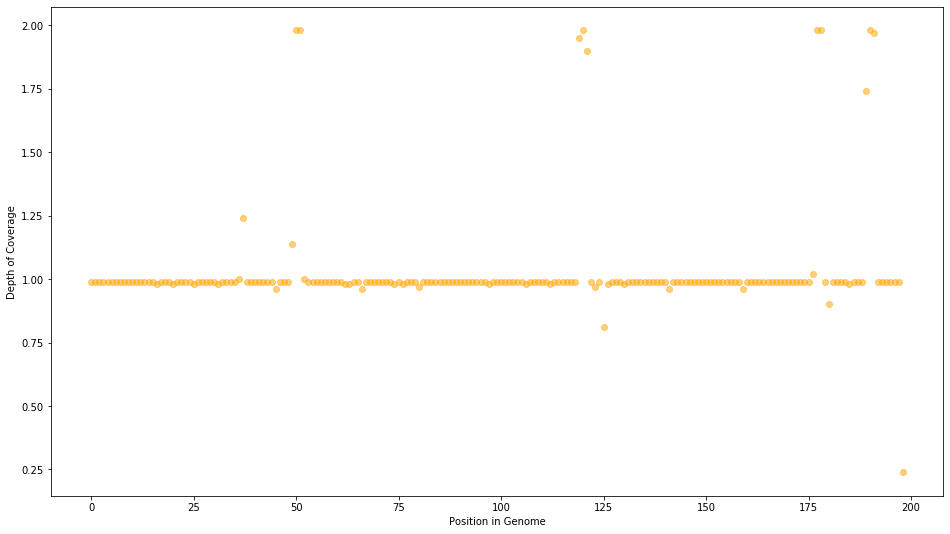

In [24]:
dep = get_depth("chr22.tab")
ave_dep = ave_depth(dep)
plot_dep(ave_dep)

## ChrX

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  This is separate from the ipykernel package so we can avoid doing imports until


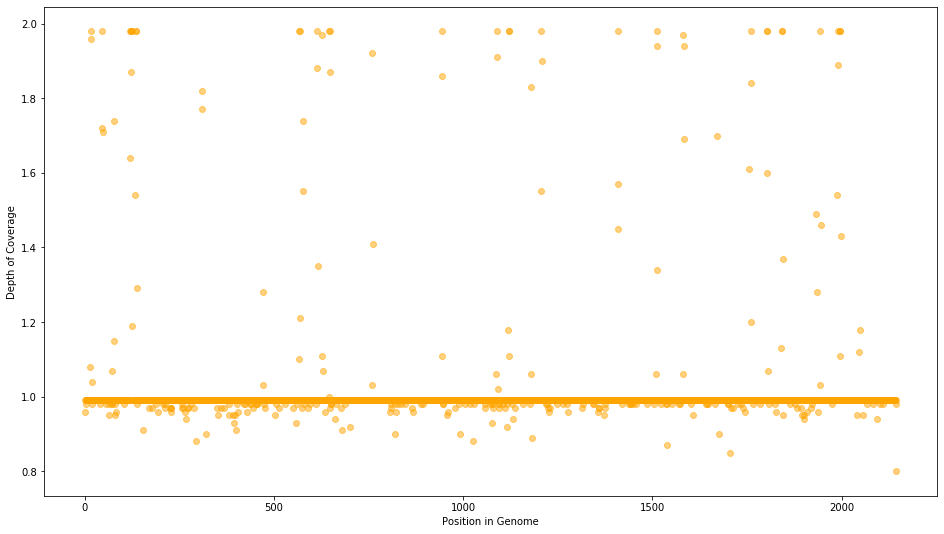

In [9]:
dep = get_depth("X.tab")
ave_dep = ave_depth(dep)
plot_dep(ave_dep)

## ChrY

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  This is separate from the ipykernel package so we can avoid doing imports until


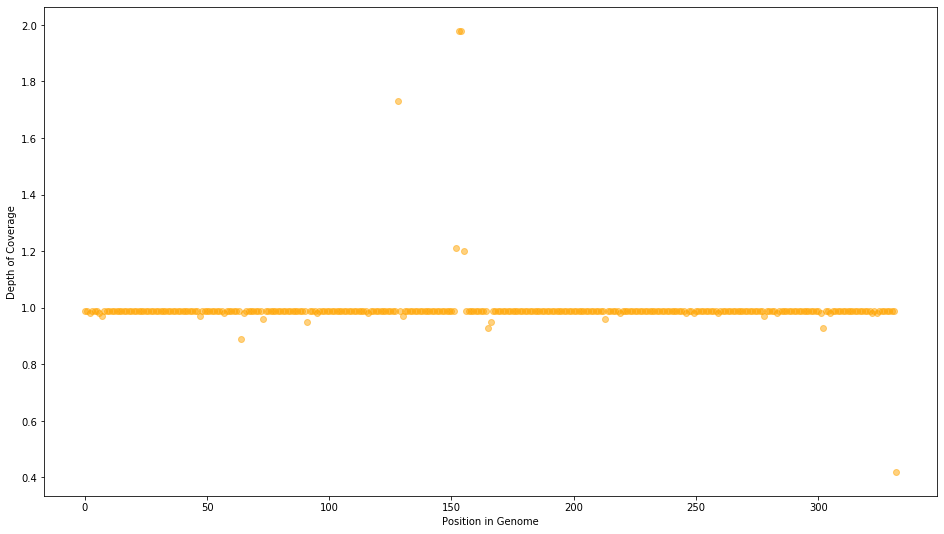

In [11]:
dep = get_depth("Y.tab")
ave_dep = ave_depth(dep)
plot_dep(ave_dep)

# Q&A

## 1. What bological sex is Jamie?

### Jamie is male. Because the coverage depth of positions on sexual chromosome Y is not zero. So Jamie must be male

# Extra Credit 2